In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd

import sys
sys.path.append("..")
import argparse
from   os.path import abspath
import gc
import os
from file_processing_loc import *


In [3]:
path = "/Users/jbmasson/Desktop/projets-gitlab/tramway_non_tracking/TRamWAy/tramway/track_non_track/data-examples/"
name = "Manip01-01-Beta400AA-01-15ms.rpt.xyt"
path_tot = path + name

In [362]:
xyt, xyt_pandas = load_xyt(path_tot)

In [363]:
movie_per_frame, n_unique = convert_to_list(xyt)

In [364]:
dt_theo, t_init, t_end = get_dt(movie_per_frame, n_unique)

In [365]:
sigma, D_high, length_high = get_local_parameters_accessible_elsewhere_in_tramway(dt_theo)

In [366]:
indice   = 2
C        = get_cost_function(indice, movie_per_frame)
C_reduced_corrected, C_reduced, edge, d_max, row_reduced, col_reduced,M,N, n_row_reduced, n_col_reduced = correct_cost_function(C,length_high)
row_reduced      = np.squeeze(np.array(row_reduced))
col_reduced      = np.squeeze(np.array(col_reduced))
print(row_reduced.shape)
print((M,N))
print((n_row_reduced, n_col_reduced))

(28,)
(45, 51)
(28, 32)


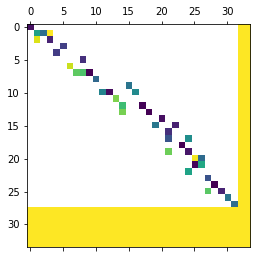

In [367]:
plt.matshow(C_reduced_corrected)

In [368]:
inf_loc          = np.isinf(C_reduced_corrected)
C_reduced_corrected[inf_loc] = d_max*1e10

In [369]:
row_ind, col_ind = linear_sum_assignment(C_reduced_corrected)
print(row_ind)
print(col_ind)
print((row_ind.shape, col_ind.shape))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
[ 0  2  3  5  4  8  6  9 10 15 12 13 17 18 20 22 21 32 23 24 26 25 33 27
 28 29 30 31  1  7 11 14 16 19]
((34,), (34,))


In [374]:
global_row       = []
global_col       = []

assingment       = np.zeros((M,N))
for i in range(len(row_reduced)):
    if col_ind[i] < n_col_reduced:
        coll    = col_reduced[col_ind[i]]
        index   = row_reduced[i]
    
    global_row.append(index)
    global_col.append(coll)
    assingment[index,col_ind]  = 1    

#index            = row_reduced[row_ind[0:n_row_reduced]]
#coll             = col_reduced[col_ind[0:n_row_reduced]]
#assingment       = np.zeros((M,N))
#assingment[index,col_ind]     = 1

In [371]:
print(global_row)

[4, 5, 6, 7, 8, 11, 12, 13, 16, 18, 19, 20, 21, 23, 24, 25, 26, 26, 28, 29, 30, 32, 32, 35, 38, 39, 40, 42]


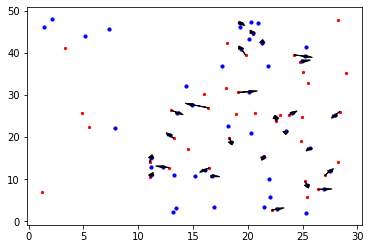

1

In [372]:
plot_linking_two_images(movie_per_frame, indice, global_row, global_col )

index            = row_reduced[row_ind[1:30]]
assingment       = np.zeros((M,N))
assingment[index,col_ind]     = 1

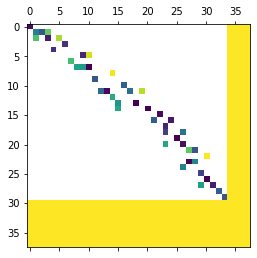

In [242]:
plt.matshow(C_reduced_corrected)

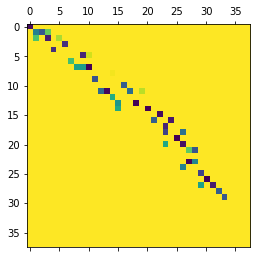

In [245]:
plt.matshow(C_reduced_corrected)

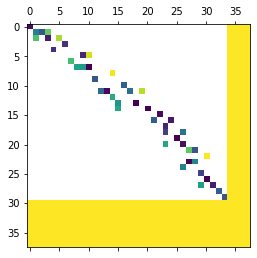

In [217]:
row_ind, col_ind = linear_sum_assignment(C_reduced_corrected)

ValueError: matrix contains invalid numeric entries

In [200]:
print(n_add)

4.0


[[ 0. inf inf ... inf inf inf]
 [inf  0.  0. ... inf inf inf]
 [inf  0. inf ... inf inf inf]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


NameError: name 'correct_deficiencies' is not defined

In [127]:
print(n_add)

16.0


In [ ]:
print(n_add)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
assingment,row_ind, col_ind =give_optimal_assigment(C, length_high)

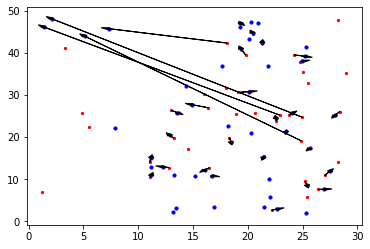

1

In [15]:
plot_linking_two_images(movie_per_frame, indice, row_ind, col_ind )


In [137]:
	(M,N)            = C.shape
	l2               = length_high**2
	#print(np.sqrt(l2))
	C[C>l2]          = np.inf

In [138]:
row_ind, col_ind = linear_sum_assignment(C)






ValueError: matrix contains invalid numeric entries

In [ ]:
def linear_sum_assignment_with_inf(cost_matrix):
    cost_matrix = np.asarray(cost_matrix)
    min_inf = np.isneginf(cost_matrix).any()
    max_inf = np.isposinf(cost_matrix).any()
    if min_inf and max_inf:
        raise ValueError("matrix contains both inf and -inf")

    if min_inf or max_inf:
        values = cost_matrix[~np.isinf(cost_matrix)]
        m = values.min()
        M = values.max()
        n = min(cost_matrix.shape)
        # strictly positive constant even when added
        # to elements of the cost matrix
        positive = n * (M - m + np.abs(M) + np.abs(m) + 1)
        if max_inf:
            place_holder = (M + (n - 1) * (M - m)) + positive
        if min_inf:
            place_holder = (m + (n - 1) * (m - M)) - positive

    cost_matrix[np.isinf(cost_matrix)] = place_holder
    return linear_sum_assignment(cost_matrix)

In [17]:
cost_matrix = C

[[       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 ...
 [       inf        inf        inf ...        inf        inf 1.01797147]
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]]


In [19]:
    cost_matrix = np.asarray(cost_matrix)
    min_inf = np.isneginf(cost_matrix).any()
    max_inf = np.isposinf(cost_matrix).any()

In [20]:
 min_inf and max_inf

False

In [21]:
if min_inf or max_inf:
        values = cost_matrix[~np.isinf(cost_matrix)]
        m = values.min()
        M = values.max()
        n = min(cost_matrix.shape)
        # strictly positive constant even when added
        # to elements of the cost matrix
        positive = n * (M - m + np.abs(M) + np.abs(m) + 1)
        if max_inf:
            place_holder = (M + (n - 1) * (M - m)) + positive
        if min_inf:
            place_holder = (m + (n - 1) * (m - M)) - positive

In [22]:
cost_matrix[np.isinf(cost_matrix)] = place_holder

In [23]:
print(cost_matrix)

[[551.8613307  551.8613307  551.8613307  ... 551.8613307  551.8613307
  551.8613307 ]
 [551.8613307  551.8613307  551.8613307  ... 551.8613307  551.8613307
  551.8613307 ]
 [551.8613307  551.8613307  551.8613307  ... 551.8613307  551.8613307
  551.8613307 ]
 ...
 [551.8613307  551.8613307  551.8613307  ... 551.8613307  551.8613307
    1.01797147]
 [551.8613307  551.8613307  551.8613307  ... 551.8613307  551.8613307
  551.8613307 ]
 [551.8613307  551.8613307  551.8613307  ... 551.8613307  551.8613307
  551.8613307 ]]


In [25]:
row_ind, col_ind = linear_sum_assignment(cost_matrix)

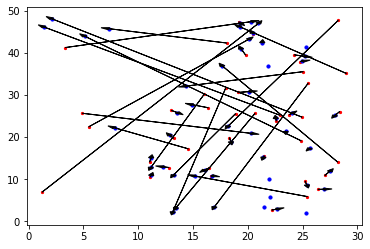

1

In [26]:
plot_linking_two_images(movie_per_frame, indice, row_ind, col_ind )

In [116]:
xyt1 = movie_per_frame[indice]
xyt2 = movie_per_frame[indice+1]

In [117]:
print(assingment.shape)
print(xyt1.shape)
print(xyt2.shape)



(45, 51)
(45, 3)
(51, 3)


In [118]:
print(row_ind)
print(col_ind)

[ 4  5  6  7  8 11 12 13 15 16 18 19 20 21 23 24 25 26 27 28 29 30 31 32
 33 35 38 39 40 42]
[ 5  7  8 13  9 17 15 18  3 22 27 24 25 30 32 34 39 38  0 40 41 44  2 42
  1 46 47 48 49 50]


In [119]:
	dx      = np.squeeze( xyt2[col_ind,0] -xyt1[row_ind,0] )
	dy      = np.squeeze( xyt2[col_ind,1] -xyt1[row_ind,1] )

In [120]:
print(np.sqrt(dx**2+ dy**2) )

[ 0.36354269  1.02100648  0.53546395  0.73718202  0.71846075  0.63245434
  1.6247976   0.10780012 11.28315163  0.98589131  1.05871671  0.29108721
  1.52386316  0.18114364  0.08578152  0.34017924  0.51135389  0.6257139
 30.01249103  0.09807108  0.41928015  1.001644   31.75847503  0.21856779
 32.68326581  0.85956225  0.05593138  0.53458028  1.05728328  1.00894572]


In [63]:
assingment[row_ind,col_ind]

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [64]:
print(assingment[:,:])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [81]:
dx =np.squeeze( xyt2[col_ind,0] -xyt1[row_ind,0])

In [82]:
dx.shape

(30,)

In [84]:
np.squeeze(xyt2[col_ind,0]).shape

(30,)

In [92]:
y_start = xyt1[row_ind,1]
y_start.shape

(1, 30)

In [76]:
dy = xyt2[col_ind,1] -xyt1[row_ind,1]

In [77]:
np.size(dy)

30

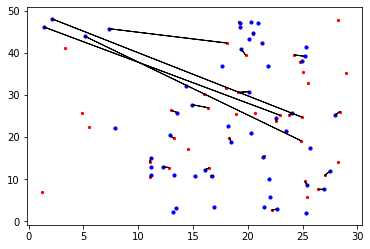

1

In [85]:
xyt1[:,0].shape

(45,)